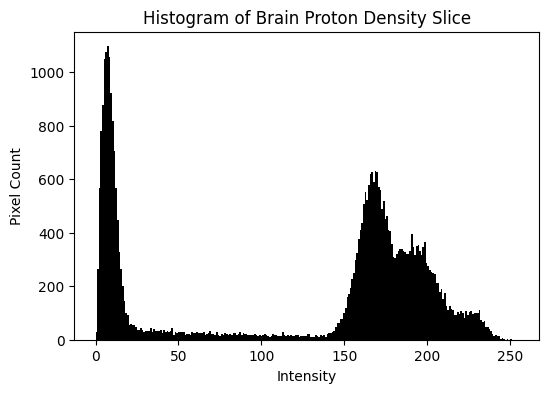

In [1]:
import cv2
import matplotlib.pyplot as plt

# Load brain slice
img = cv2.imread("brain_proton_density_slice.png", cv2.IMREAD_GRAYSCALE)

# Plot histogram
plt.figure(figsize=(6,4))
plt.hist(img.ravel(), bins=256, range=(0,255), color='black')
plt.title("Histogram of Brain Proton Density Slice")
plt.xlabel("Intensity")
plt.ylabel("Pixel Count")
plt.show()


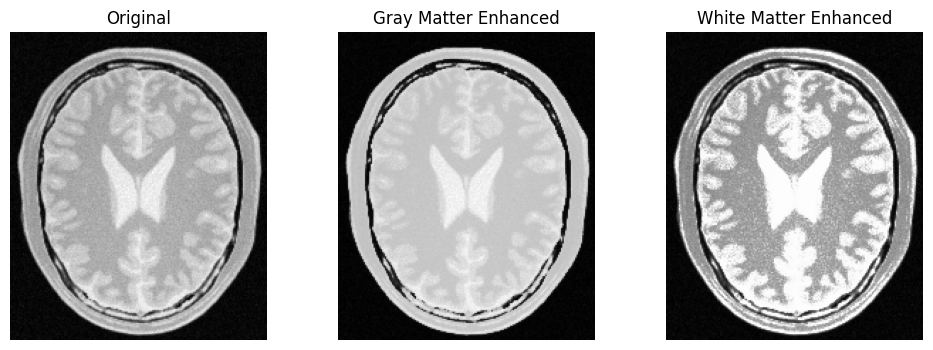

In [18]:
import numpy as np


gray = [(0,0), (80,50), (120,180), (180,200), (255,255)]

white = [(0, 0),(120, 100),(170, 160),(200, 250), (255, 255)]

def build_lut(control_pts):
    xp, yp = zip(*control_pts)
    return np.interp(np.arange(256), xp, yp).astype(np.uint8)

lut_gray = build_lut(gray)
lut_white = build_lut(white)

img_gray = cv2.LUT(img, lut_gray)
img_white = cv2.LUT(img, lut_white)

# Show results
plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.imshow(img, cmap='gray'); plt.title("Original")
plt.axis("off")
plt.subplot(1,3,2); plt.imshow(img_gray, cmap='gray'); plt.title("Gray Matter Enhanced")
plt.axis("off")
plt.subplot(1,3,3); plt.imshow(img_white, cmap='gray'); plt.title("White Matter Enhanced")
plt.axis("off")
plt.show()
